# 함수

## 000n 형태 만들기

In [119]:
def plus_0s(value):
    
    if len(value) == 4:
        pass
    elif len(value) == 3:
        value = '0' + value
    elif len(value) == 2:
        value = '00' + value
    else:
        value = '000' + value
    
    return value

## split_hour_minute

In [123]:
def split_hour_minute(data):
    
    # hrmt가 들어간 컬럼 리스트 가져오기
    hrmt_list = list(data.columns[data.columns.str.contains('hrmt')])
    
    for i in hrmt_list:
        # 컬럼별 round(), str 변환
        data[i] = tem[i].apply(round)
        data[i] = data[i].astype(str)
        
        # 유효자리 4자리
        data[i] = data[i].apply(plus_0s)
        
        # hr. mt 분리
        hr_name = i[:-2]
        mt_name = i[:-4] + 'mt'
        data[hr_name] = data[i].str.slice(start = 0, stop = 2)
        data[mt_name] = data[i].str.slice(start = 2, stop = 4)
    
    return data

## multi_distplot

In [125]:
def multi_distplot(data):
    
    col_n = data.shape[1] - 2
    plt.figure(figsize=(15,20))

    for i in range(col_n):
        plt.subplot(6, 4, i+1)
        sns.distplot(data.iloc[:,i+2], kde=False)

# aws_ta

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [9]:
pd.set_option('display.max_columns', 30)

In [146]:
tem = pd.read_csv('../data/22.savedata_weather/aws_ta.csv')
tem.head()

,tma,stn_id,avg_ta,avg_ta_calc_dtnb,max_ta,max_ta_hrmt,min_ta,min_ta_hrmt,ta_calp_dtnb,rtm_ta,rtm_ta_hrmt
0,2016-04-01 00:00:00,515,8.0,60.0,8.9,2328.0,7.3,2354.0,60.0,7.5,0.0
1,2016-04-01 00:00:00,616,7.2,60.0,7.8,2303.0,6.6,2337.0,60.0,6.8,0.0
2,2016-04-01 00:00:00,634,8.7,60.0,9.1,2326.0,8.2,0.0,60.0,8.2,0.0
3,2016-04-01 00:00:00,637,7.1,60.0,8.1,2309.0,6.4,2323.0,60.0,7.2,0.0
4,2016-04-01 01:00:00,515,6.6,60.0,7.7,3.0,5.8,54.0,60.0,5.9,100.0


In [147]:
tem = tem.drop(columns=['rtm_ta', 'rtm_ta_hrmt', 'avg_ta_calc_dtnb', 'ta_calp_dtnb'])
tem.head()

,tma,stn_id,avg_ta,max_ta,max_ta_hrmt,min_ta,min_ta_hrmt
0,2016-04-01 00:00:00,515,8.0,8.9,2328.0,7.3,2354.0
1,2016-04-01 00:00:00,616,7.2,7.8,2303.0,6.6,2337.0
2,2016-04-01 00:00:00,634,8.7,9.1,2326.0,8.2,0.0
3,2016-04-01 00:00:00,637,7.1,8.1,2309.0,6.4,2323.0
4,2016-04-01 01:00:00,515,6.6,7.7,3.0,5.8,54.0


In [148]:
tem = split_hour_minute(tem)
tem.head()

,tma,stn_id,avg_ta,max_ta,max_ta_hrmt,min_ta,min_ta_hrmt,max_ta_hr,max_ta_mt,min_ta_hr,min_ta_mt
0,2016-04-01 00:00:00,515,8.0,8.9,2328,7.3,2354,23,28,23,54
1,2016-04-01 00:00:00,616,7.2,7.8,2303,6.6,2337,23,03,23,37
2,2016-04-01 00:00:00,634,8.7,9.1,2326,8.2,0000,23,26,00,00
3,2016-04-01 00:00:00,637,7.1,8.1,2309,6.4,2323,23,09,23,23
4,2016-04-01 01:00:00,515,6.6,7.7,0003,5.8,0054,00,03,00,54


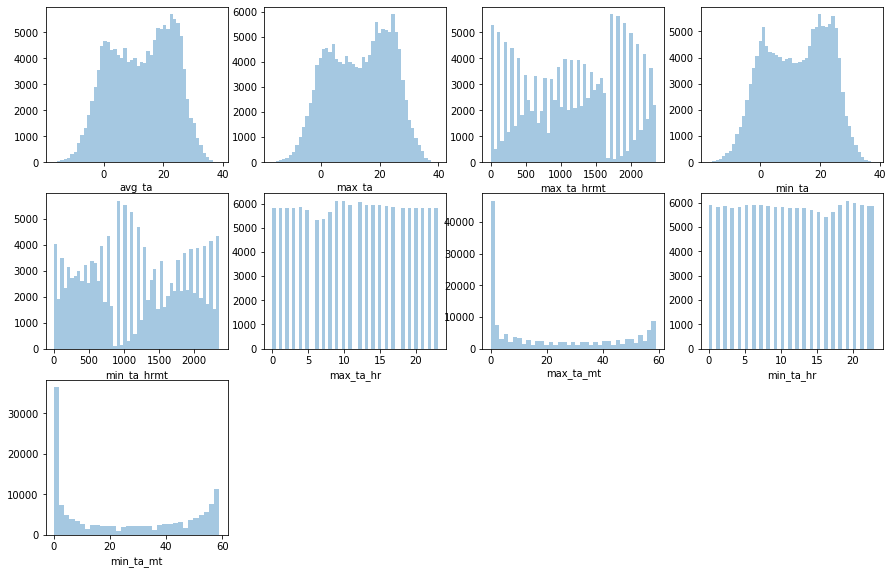

In [149]:
multi_distplot(tem)

In [141]:
tem['max_ta_mt'].value_counts()

01    39100
00     7603
59     4833
02     4063
58     3751
03     3279
57     3161
04     2865
56     2640
05     2460
55     2378
54     2210
06     2153
07     2038
53     1952
08     1874
09     1858
52     1843
10     1631
51     1596
11     1582
50     1538
12     1486
13     1469
49     1468
48     1427
14     1370
47     1370
46     1318
16     1285
45     1254
15     1251
17     1237
44     1201
18     1186
43     1175
19     1151
20     1138
40     1133
42     1106
22     1084
41     1083
21     1082
39     1071
25     1052
23     1036
29     1032
31     1028
32     1026
36     1017
37     1015
38     1010
35     1002
30      987
26      984
34      983
28      978
24      978
33      970
27      967
Name: max_ta_mt, dtype: int64

In [150]:
tem_short = tem[['tma', 'stn_id', 'avg_ta']]

# aws_wind

In [151]:
wind = pd.read_csv('../data/22.savedata_weather/aws_wind.csv')
wind.head()

,tma,stn_id,avg_ws,mix_ws,mix_wd,max_ws,max_ws_hrmt,avg_ws_calc_dtnb,max_wd,max_ws_wd,avg_mi1_ws,max_mi1_ws,max_mi1_ws_hrmt,mi1_ws_calc_dtnb,max_mi1_ws_wd,max_ins_ws,max_ins_ws_hrmt,max_ins_ws_wd,ins_ws_calp_dtnb,rtm_mi10_avg_ws,rtm_mi10_avg_wd,rtm_mi10_avg_ws_hrmt,ws_calp_dtnb
0,2016-04-01 00:00:00,515,0.5,0.5,99.3,0.9,2328.0,60,90.0,94.0,0.6,1.1,2322.0,60,84.2,1.4,2322.0,98.4,60,0.8,112.5,0.0,60
1,2016-04-01 00:00:00,616,0.3,0.3,166.0,0.7,2333.0,60,157.5,152.3,0.3,1.0,2330.0,60,141.4,1.1,2330.0,137.8,60,0.3,0.0,0.0,60
2,2016-04-01 00:00:00,634,0.4,0.3,127.3,1.1,2309.0,60,112.5,119.6,0.3,1.2,2305.0,60,115.4,1.2,2304.0,120.9,60,0.0,0.0,0.0,60
3,2016-04-01 00:00:00,637,0.7,0.6,210.6,0.9,2303.0,60,225.0,147.3,0.7,1.1,0.0,60,216.9,1.1,2351.0,213.8,60,0.9,225.2,0.0,60
4,2016-04-01 01:00:00,515,0.5,0.2,141.4,0.9,1.0,60,112.5,110.3,0.4,1.0,12.0,60,121.4,1.2,13.0,115.3,60,0.2,0.0,100.0,60


In [152]:
wind.columns

Index(['tma', 'stn_id', 'avg_ws', 'mix_ws', 'mix_wd', 'max_ws', 'max_ws_hrmt',
       'avg_ws_calc_dtnb', 'max_wd', 'max_ws_wd', 'avg_mi1_ws', 'max_mi1_ws',
       'max_mi1_ws_hrmt', 'mi1_ws_calc_dtnb', 'max_mi1_ws_wd', 'max_ins_ws',
       'max_ins_ws_hrmt', 'max_ins_ws_wd', 'ins_ws_calp_dtnb',
       'rtm_mi10_avg_ws', 'rtm_mi10_avg_wd', 'rtm_mi10_avg_ws_hrmt',
       'ws_calp_dtnb'],
      dtype='object')

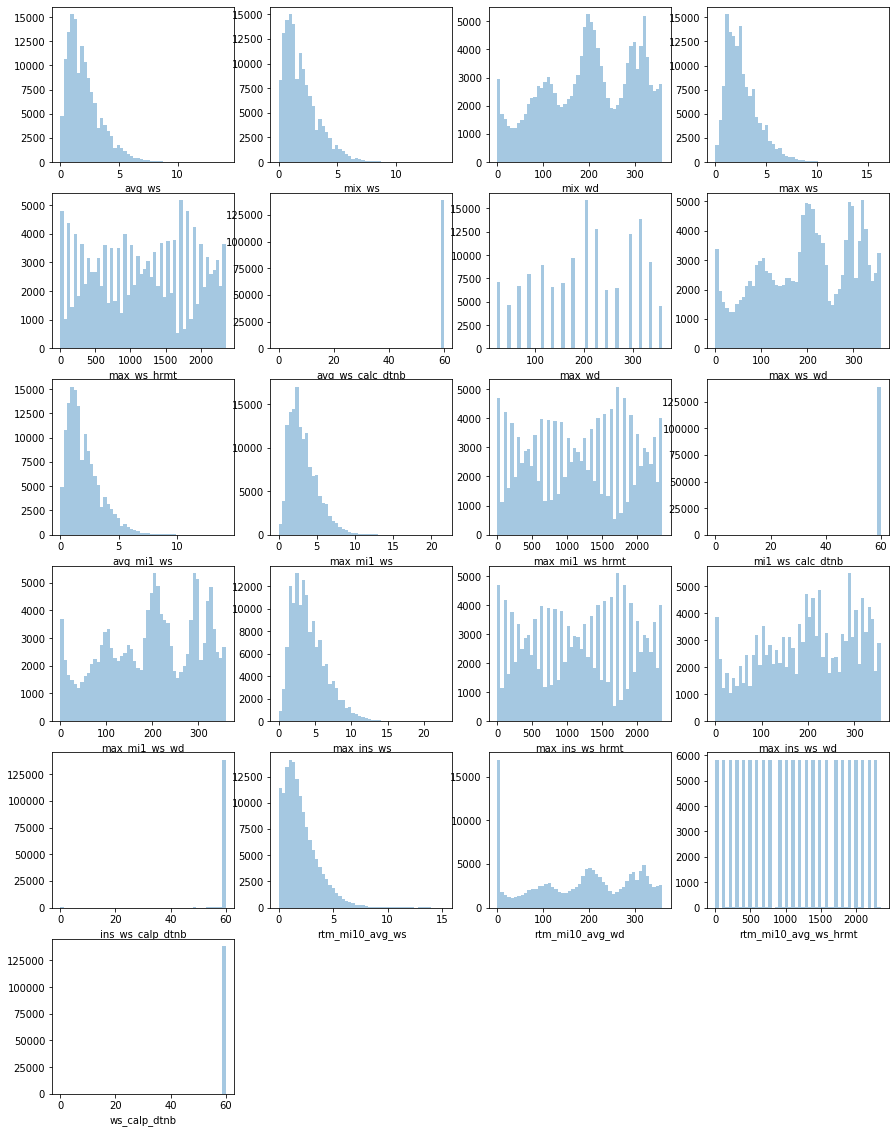

In [153]:
multi_distplot(wind)

In [154]:
wind_short = wind[['avg_ws', 'max_ws', 'max_ws_wd', 'max_ins_ws', 'max_ins_ws_wd']]
wind_short.head()

,avg_ws,max_ws,max_ws_wd,max_ins_ws,max_ins_ws_wd
0,0.5,0.9,94.0,1.4,98.4
1,0.3,0.7,152.3,1.1,137.8
2,0.4,1.1,119.6,1.2,120.9
3,0.7,0.9,147.3,1.1,213.8
4,0.5,0.9,110.3,1.2,115.3


## sea_buoy

In [155]:
bu = pd.read_csv('../data/22.savedata_weather/sea_buoy.csv')
bu.head()

,tma,stn_id,wd_n1,ws_n1,gust_ws_n1,wd_n2,ws_n2,gust_ws_n2,pa,hm,ta,wrtm,max_wh,atent_wh,avg_wh,wvprd,wvdr
0,2016-04-01 00:00:00,22101,143.0,2.0,2.6,146.0,1.0,2.3,1015.5,72.0,8.4,5.8,0.0,0.0,0.0,4.0,319.0
1,2016-04-01 00:30:00,22101,103.0,0.0,1.1,101.0,0.0,1.0,1015.3,67.0,8.8,5.6,0.0,0.0,0.0,4.0,314.0
2,2016-04-01 01:00:00,22101,72.0,0.0,0.7,64.0,0.0,0.3,1015.1,57.0,8.0,5.7,0.0,0.0,0.0,2.0,360.0
3,2016-04-01 01:30:00,22101,10.0,1.0,2.9,11.0,1.0,2.8,1015.2,44.0,8.9,5.7,0.0,0.0,0.0,4.0,308.0
4,2016-04-01 02:00:00,22101,46.0,3.0,4.6,49.0,3.0,4.7,1015.0,40.0,11.2,5.7,0.0,0.0,0.0,4.0,320.0


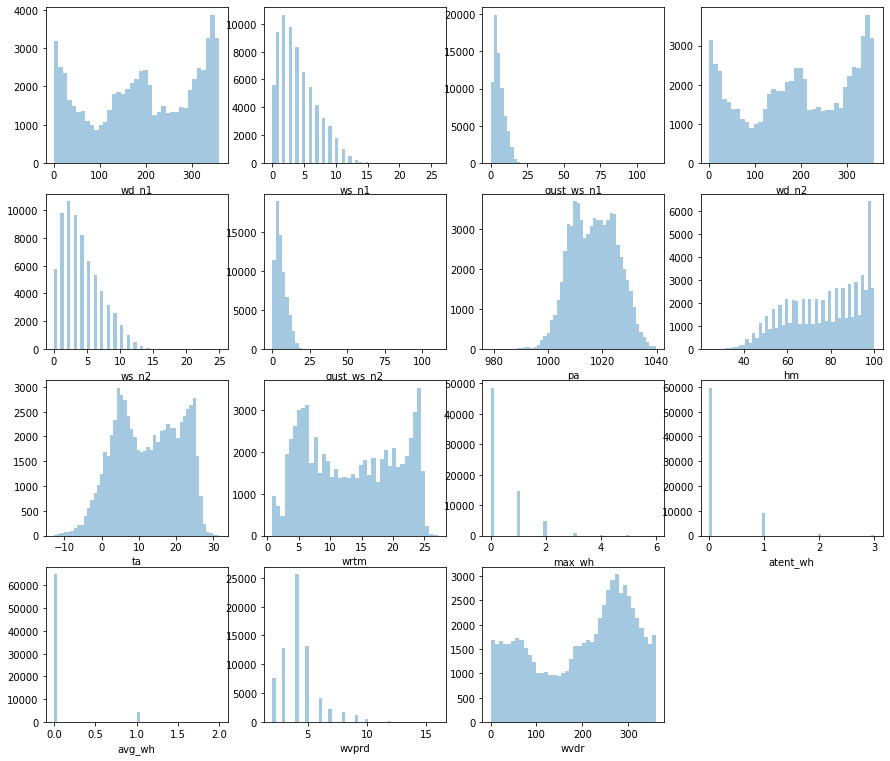

In [156]:
multi_distplot(bu)

In [157]:
bu_short = bu[['wd_n1', 'ws_n1', 'gust_ws_n1', 'pa', 'hm', 'ta', 'max_wh', 'avg_wh']]
bu_short.head()

,wd_n1,ws_n1,gust_ws_n1,pa,hm,ta,max_wh,avg_wh
0,143.0,2.0,2.6,1015.5,72.0,8.4,0.0,0.0
1,103.0,0.0,1.1,1015.3,67.0,8.8,0.0,0.0
2,72.0,0.0,0.7,1015.1,57.0,8.0,0.0,0.0
3,10.0,1.0,2.9,1015.2,44.0,8.9,0.0,0.0
4,46.0,3.0,4.6,1015.0,40.0,11.2,0.0,0.0


# sea_lb

In [158]:
lb = pd.read_csv('../data/22.savedata_weather/sea_lb.csv')
lb.head()

,tma,stn_id,wd,ws,max_ins_wd,max_iws,max_iws_tma_mi,ta,min_ta,min_ta_tma_mi,max_ta,max_ta_tma_mi,ps,pw_volt,hm
0,2016-04-01 00:00:00,955,78.0,0.8,60,4,639,9.0,5.9,1.0,14.6,1302.0,1015.7,12.1,55.0
1,2016-04-01 00:30:00,955,59.0,1.5,59,3,20,9.4,8.8,0.0,10.6,27.0,1015.4,12.1,50.0
2,2016-04-01 01:00:00,955,30.0,1.3,59,3,20,11.5,8.8,0.0,12.0,51.0,1015.2,12.1,29.0
3,2016-04-01 01:30:00,955,14.0,3.3,10,4,120,12.2,8.8,0.0,13.2,121.0,1015.1,12.1,26.0
4,2016-04-01 02:00:00,955,335.0,1.6,10,4,120,11.0,8.8,0.0,13.2,121.0,1015.0,12.1,31.0


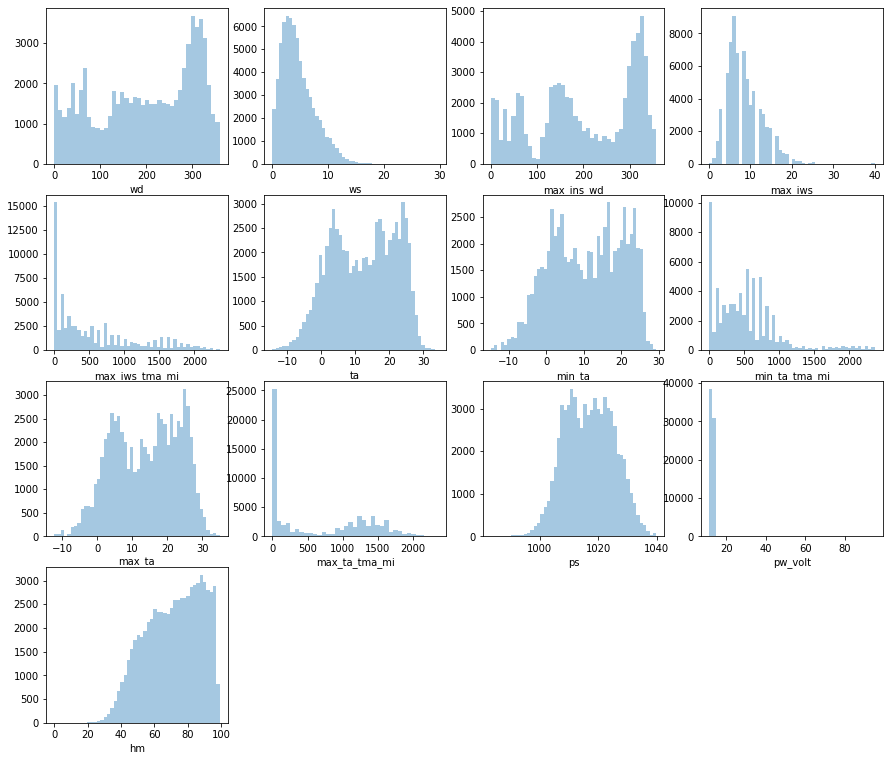

In [159]:
multi_distplot(lb)

In [160]:
lb.columns

Index(['tma', 'stn_id', 'wd', 'ws', 'max_ins_wd', 'max_iws', 'max_iws_tma_mi',
       'ta', 'min_ta', 'min_ta_tma_mi', 'max_ta', 'max_ta_tma_mi', 'ps',
       'pw_volt', 'hm'],
      dtype='object')

In [161]:
lb_short = lb[['tma', 'stn_id', 'wd', 'ws', 'max_ins_wd', 'max_iws', 'ta', 'ps', 'hm']]

In [162]:
lb_short.head()

,tma,stn_id,wd,ws,max_ins_wd,max_iws,ta,ps,hm
0,2016-04-01 00:00:00,955,78.0,0.8,60,4,9.0,1015.7,55.0
1,2016-04-01 00:30:00,955,59.0,1.5,59,3,9.4,1015.4,50.0
2,2016-04-01 01:00:00,955,30.0,1.3,59,3,11.5,1015.2,29.0
3,2016-04-01 01:30:00,955,14.0,3.3,10,4,12.2,1015.1,26.0
4,2016-04-01 02:00:00,955,335.0,1.6,10,4,11.0,1015.0,31.0
